In [1]:
# 標準ライブラリ
import os
import datetime as dt
from datetime import timedelta
from statistics import mean, median,variance,stdev
import itertools
# サードパーティライブラリ
import numpy as np
import pandas as pd
import burst_detection as bd

from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
from matplotlib.dates import date2num

In [2]:
prefs = ['tk', 'hk', 'is']
flags = ["icho", "kaede", "koyo"]

In [3]:
out_path = "./result/04graph/"
os.makedirs(out_path, exist_ok=True)

rates = range(10, 101, 10)

In [47]:
def fscore_read(path, pref, flag):
    info = pd.read_csv(path, index_col=0)

    return (pref, flag, info["rate"], info["fscore"])

In [58]:
def plot_fscores(*args):
    figure_ = plt.figure()  # Figure作成
    axes_ = figure_.add_subplot(111)  # Axes作成
    
    yaxis_ = axes_.yaxis  # YAxis取得
    
#     y_nums = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#     axes_.yaxis.set_major_locator(ticker.FixedLocator(y_nums))
#     axes_.set_ylim(ymin=0)
    
    x_nums = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    axes_.xaxis.set_major_locator(ticker.FixedLocator(x_nums))
    
    for arg in args:
        axes_.plot(rates, arg[3], label=arg[1])
    
    plt.legend()
    
    fname = f"hogehoge.png"
    plt.savefig(out_path + fname, format="png", dpi=300)
    plt.show()
    plt.close()

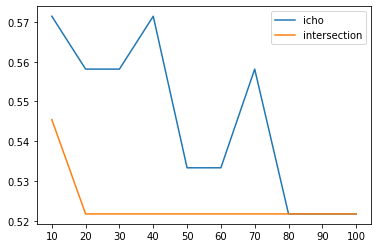

In [61]:
pref = "tk"
flag = "icho"
icho = fscore_read(f"./result/03fscores/icho/tk_icho.csv", pref, flag)
insec = fscore_read(f"./result/03fscores/icho/tk_insec.csv", pref, "intersection")

plot_fscores(icho, insec)

In [62]:
insec

('tk',
 'intersection',
 0     10.0
 1     20.0
 2     30.0
 3     40.0
 4     50.0
 5     60.0
 6     70.0
 7     80.0
 8     90.0
 9    100.0
 Name: rate, dtype: float64,
 0    0.545455
 1    0.521739
 2    0.521739
 3    0.521739
 4    0.521739
 5    0.521739
 6    0.521739
 7    0.521739
 8    0.521739
 9    0.521739
 Name: fscore, dtype: float64)

In [44]:
tk = {}

pref = "is"
for flag in flags:
    tk[flag] = fscore_read(f"./result/03fscores/all/{pref}_{flag}.csv", pref, flag)


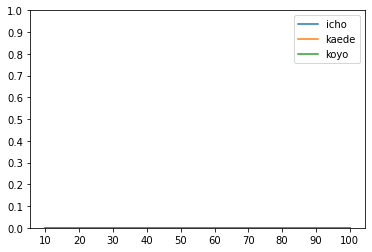

In [45]:
plot_fscores(tk["icho"], tk["kaede"], tk["koyo"])

In [51]:
is00 = pd.read_csv(f"./result/03fscores/all/is_koyo.csv", index_col=0)
is00

,rate,fscore,recall,precision
0,10,0,0,0
1,20,0,0,0
2,30,0,0,0
3,40,0,0,0
4,50,0,0,0
5,60,0,0,0
6,70,0,0,0
7,80,0,0,0
8,90,0,0,0
9,100,0,0,0


In [54]:
hk = pd.read_csv(f"./result/03fscores/all/hk_koyo.csv", index_col=0)
hk

,rate,fscore,recall,precision
0,10.0,0.000000,0.00000,0.000000
1,20.0,0.000000,0.00000,0.000000
2,30.0,0.520000,0.40625,0.722222
3,40.0,0.520000,0.40625,0.722222
4,50.0,0.419355,0.40625,0.433333
5,60.0,0.000000,0.00000,0.000000
6,70.0,0.419355,0.40625,0.433333
7,80.0,0.419355,0.40625,0.433333
8,90.0,0.000000,0.00000,0.000000
9,100.0,0.280702,0.25000,0.320000


In [ ]:




icho = pd.read_csv("./result/03fscores/koyo/tk_koyo.csv", index_col=0)
ukoyo1_icho = pd.read_csv("./result/03fscores/koyo/tk_koyo_icho.csv", index_col=0)

In [ ]:
plot_fscores(["tk", "koyo", icho["rate"], icho["fscore"]], ["tk", "koyo+icho", ukoyo1_icho["rate"], ukoyo1_icho["fscore"]])